In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score, max_error

In [ ]:
df = pd.read_csv('RedWineQuality.csv')

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#input feature (X) and output feature (Y)
X = df.drop('quality', axis=1)
y = df['quality']


In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [ ]:
# Split data into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# initialize models
dtregModel = DecisionTreeRegressor(max_depth = 2, random_state = 0)
adbregModel = AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
# creating lists
# mean_absolute_error
mean_adbreg = []
mean_dtreg = []
# r2_score
r2_adbreg = []
r2_dtreg = []
# variance_score
var_adbreg = []
var_dtreg = []
# max_error
max_adbreg = []
max_dtreg =[]


In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
for train_i, test_i in kf.split(X, y):
      X_train_data, X_test_data = X.iloc[train_i], X.iloc[test_i]
      y_train_data, y_test_data = y.iloc[train_i], y.iloc[test_i]

      # Train the model on the training data
      dtregModel.fit(X_train_data , y_train_data)
      predict_dtreg = dtregModel.predict(X_test_data)   # actual predicted value after giving the input testing data

      # max_error-dt
      score = max_error(y_test_data , predict_dtreg)
      max_dtreg.append(score)

     # variance_score-dt
      score = explained_variance_score(y_test_data , predict_dtreg)
      var_dtreg.append(score)

     #r2_score-dt
      score = r2_score(y_test_data , predict_dtreg)
      r2_dtreg.append(score)

    # mean_absolute_error -dt
      score = mean_absolute_error(y_test_data , predict_dtreg)
      mean_dtreg.append(score)

      #---------------adbreg--------------------

      adbregModel.fit(X_train_data , y_train_data)
      predict_adbreg = adbregModel.predict(X_test_data)  # actual predicted value after giving the input testing data

      # max_error -adb
      score = max_error(y_test_data , predict_adbreg)
      max_adbreg.append(score)

     # variance_score -adb
      score = explained_variance_score(y_test_data , predict_adbreg)
      var_adbreg.append(score)

     #r2_score -adb
      score = r2_score(y_test_data , predict_adbreg)
      r2_adbreg.append(score)

    # mean_absolute_error -adb
      score = mean_absolute_error(y_test_data , predict_adbreg)
      mean_adbreg.append(score)





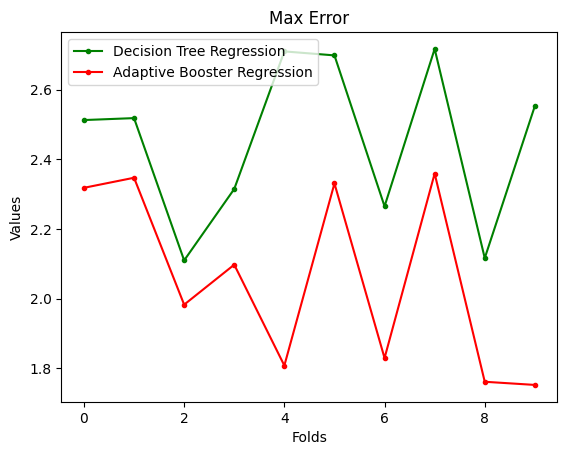

In [ ]:
#visualization plt
#max_error
indices = np.arange(10)

plt.plot(indices , max_dtreg , color = "green" , label= "Decision Tree Regression", marker = ".")
plt.plot(indices , max_adbreg , color = "red" , label= "Adaptive Booster Regression", marker = ".")

plt.xlabel("Folds")
plt.ylabel("Values")
plt.title("Max Error")

plt.legend()
plt.show()

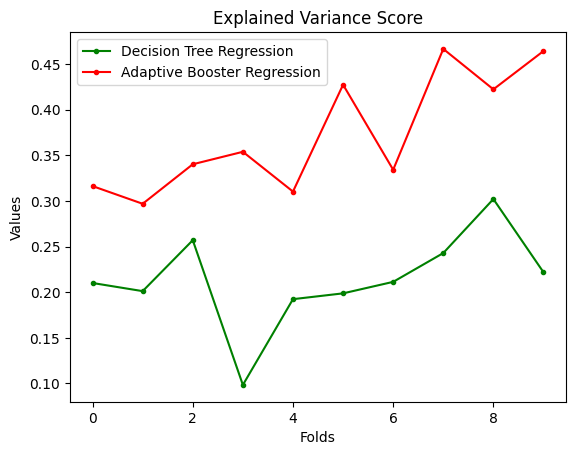

In [ ]:
#variance_score
indices = np.arange(10)

plt.plot(indices , var_dtreg , color = "green" , label= "Decision Tree Regression", marker = ".")
plt.plot(indices , var_adbreg , color = "red" , label= "Adaptive Booster Regression", marker = ".")

plt.xlabel("Folds")
plt.ylabel("Values")
plt.title("Explained Variance Score")

plt.legend()
plt.show()

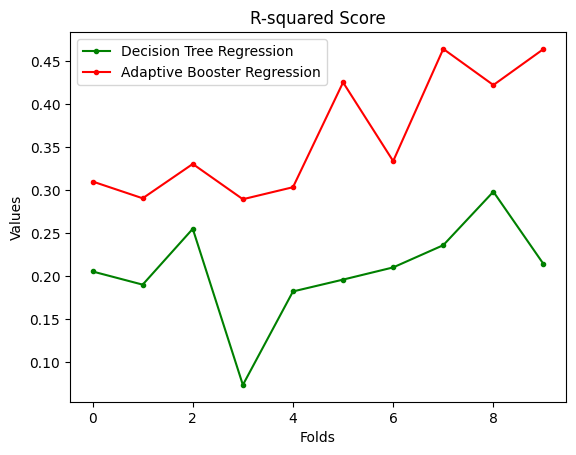

In [ ]:
# r2_score
indices = np.arange(10)

plt.plot(indices , r2_dtreg , color = "green" , label= "Decision Tree Regression", marker = ".")
plt.plot(indices , r2_adbreg , color = "red" , label= "Adaptive Booster Regression", marker = ".")

plt.xlabel("Folds")
plt.ylabel("Values")
plt.title("R-squared Score")

plt.legend()
plt.show()

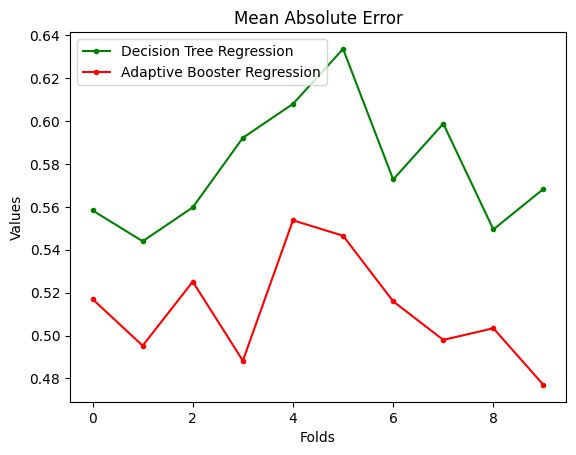

In [ ]:
# mean_absolute_error
indices = np.arange(10)

plt.plot(indices , mean_dtreg , color = "green" , label= "Decision Tree Regression", marker = ".")
plt.plot(indices , mean_adbreg , color = "red" , label= "Adaptive Booster Regression", marker = ".")

plt.xlabel("Folds")
plt.ylabel("Values")
plt.title("Mean Absolute Error")

plt.legend()
plt.show()